# Data Collection, Step 3: Organizing Data

Some of my tweets were gathered in a couple of iterations because of various issues. 

#### I first need to gather all tweets for each location into a single file. 

In [1]:
import numpy as np

def combine_files(location, num):
    files = []
    for i in (np.arange(num) + 1):
        f = open(location.lower() + "-more-tweets-" + str(i) + ".txt", "r")
        files.append(f)

    out = open(location.lower() + "-more-tweets.txt", "w")
    for file in files:
        for line in file:
            out.write(line)
        file.close()
    out.close()

In [2]:
combine_files("la", 5)

In [3]:
combine_files("nyc", 4)

#### Next, I need to split by date. 

I will consider any tweets from December 31, 2019 or before as "before COVID" tweets. For the "after COVID" tweets, we will consider any tweets from March 10, 2020 or after (the day the WHO declared COVID-19 as a pandemic).

Note that each line of the tweet files takes the format: 

    created_at TAB author screen_name TAB tweet text

In [5]:
from datetime import datetime

def split_tweets_by_date(location):
    file   = open(location.lower() + "-more-tweets.txt", "r")
    before = open(location.lower() + "-before-covid-more.txt", "w")
    after  = open(location.lower() + "-after-covid-more.txt", "w")
    
    num_tweets = {"before":0, "after":0, "in between":0}
    total_tweets = 0
    
    first_tweet = True
    
    # get the tweets in each time range, and alter newline chars within tweets
    for line in file: 
        try:
            # try to get the date of the tweet
            date_created = line.split('\t')[0]
            date = datetime.strptime(date_created, "%a %b %d %H:%M:%S %z %Y") #DOW Month Day H:M:S UTC+ Year 
                
            # sort tweet by date created and write to correct file
            if date.year < 2020:
                prev = "before"
                before.write("\n" + line[:-1])
            elif date.month > 3 or (date.month == 3 and date.day >= 10):
                prev = "after"
                after.write("\n" + line[:-1])
            else:
                prev = "in between"
                
            num_tweets[prev] += 1
            total_tweets += 1
            
            if total_tweets % 500 == 0:
                print(prev + ":", num_tweets[prev])
            
        # if the first part of the line isn't a date object, append it to the previous line
        # (means there was a newline within the text of the tweet)
        except:
            if prev == "before":
                before.write(" <NEWLINE> " + line[:-1])
            elif prev == "after":
                after.write(" <NEWLINE> " + line[:-1])
            
    file.close()    
    before.close()
    after.close()
        
    print("\nremoved newlines and split tweets")
    print(num_tweets['before'], "tweets from before COVID")
    print(num_tweets['after'], "tweets from after COVID")
    print(num_tweets['in between'], "other tweets")
    print("---------------------")
    print(total_tweets, "total tweets")

In [ ]:
split_tweets_by_date("Sydney")

In [ ]:
split_tweets_by_date("Seattle")

In [ ]:
split_tweets_by_date("NYC")

In [ ]:
split_tweets_by_date("London")

In [ ]:
split_tweets_by_date("LA")

#### Next, I need to determine which tweets are climate-change related and copy them to a separate file.

I'm using the [UN Global Pulse Taxonomy of Climate Change Terms](http://www.unglobalpulse.net/climate/taxonomy/) to determine criteria for a climate-related tweet. I have a list of tuples, each of the form 

    (includes, AND, NOT)
    
to most effectively represent the taxonomy. Each tuple has a name of the topic it describes, which I will be saving to potentially look at later. 

Edit April 22: The number of tweets I was getting was very small. I added a few more topics at the bottom in the hopes of collecting a few more tweets (though the numbers are still very small).

In [21]:
climate_terms = {
    "General 1": ("climate change, global warming, climatology, extreme climate, extreme weather, rising temperatures, rising temperature, hot planet, hotter planet, warming planet, heating planet, ozone layer, price of carbon, price of emissions, charge for emissions, cost of emissions, sea level, sea-level, ocean level, greenhouse gas, green house gas, greenhouse gases, green house gases, fossil fuel, fossil fuels, CDM procedures, sustainable forest management, cancun decision, copenhagen accord, kyoto protocol, kyoto agreement, energy tax, transport tax, aviation tax, energy taxes, transport taxes, aviation taxes, thermohaline, hydrofluorocarbons, bonn agreements",
                  "",
                  ""),
    "General 2": ("drought, droughts",
                  "",
                  "goal, goals, scoring, title, titles, sex, Rooney, nigga, niggas, championship, goalless, win"),
    "Risk/Disaster": ("climate, enviro, environment",
                      "flood, flooding, floods, flooded, hunger, poverty, disaster, disasters, earth, earthquake, dying, death, deaths, collapse, tsunami, tsunamis, kill, killing, killer, killers, tornado, tornados, pollution, polluting, polluters, pollutant, pollutants, famine, smog, disease, diseases, wildfires, fire, fires, smoke, windfall, survive, destroying, destroys, destroyed, hurricane, hurricanes, sealife, acidification, disruption, dilemma, trilemma, solving, solve, solved, solution, solutions, uninhabitable, endanger, endangered, endangering, consequence, consequences, catastrophic, catastrophe, catastrophes, fail, failed, failing, failure, triggers, triggered, set off, trigger, changes, changed, changing, lost, losing, losers, lose, irreversible, model, models, modeling, modelling, modelled, modeled, mitigate, mitigation, mitigates, mitigations, adaptation, adapt, adapts, adaptations, rise, risen, rises, rising, shifting, shifted, shifts, damage, damages, damaged, damaging, toxic, toxicity, crisis, crises, health, intensity, intentify, intensifies, sink, sinks, sinking",
                      ""),
    "Politics/Opinion": ("climate, enviro, environment, carbon",
                         "rio+20, rio +20, rio convention, rio conventions, rio summit, g8, group of eight, group of 8, negotiate, negotiation, negotiations, consensus, G77, ICC, fifth assessment report, ar5, ar 5, ipcc, rio+10, rio +10, unctad, article 9, unfccc, grulac, activism, activists, activist, politics, political, politician, politicans, mayor, mayors, extreme, extremes, extremists, republicans, republican, democrat, democrats, conservative, conservatives, liberal, liberals, government, gov, govs, governance, governments, govt, world, worldwide, globe, global, international, intl, conference, conferences, partner, partnership, partners, partnerships, stakeholder, stake holder, stakeholders, stake holders, accord, accords, ad hoc, sector, sectors, sectoral, ratify, ratified, ratification, indigenous, gender, unep, undp, united nations, MDGs, MDG, millennium dev, development, rant, rants, ranted, ranting, region, regional, human rights, science, scientist, scientific, skeptic, skeptics, skeptical, skepticism, deny, denial, denying, deniers, knowledge, conspiracy, conspiracies, cut, cuts, cutting, debate, debates, debated, debating, debatable, sensitive, sensitivity, sensitivities, doubting, doubt, doubters, doubted, econ, economic, economy, economics, ground, grounds, building blocks, battle, battling, battled, manmade, man-made, man made, disprove, disproving, disproves, disproved, physicist, thrive, exposure, exposing, exposed act, action, acting, actions, acts chaos, chaotic, inaction, commit, commits, commitment, commitments, committed, comitted, target, targets, targeting, targeted, conservation, innovation, innovations, innovative, conservationists, conserving, justice, fight, fighting, fought, boost, boosting, boosted, permawar, warned, warning, warned, warn, urges, urging, tackling, tackles, tackle, humanity, efficient, efficiency, emergency, exacerbates, Greenland, proof, proving, proves, proven, myth, severe, adaption, combat, combatting, hits, hitting, equipped, equipping, future threat, threats, threatens, worry, worried, worries, anxious, anxiety, reality, risk, risky, risks, risked, risking, concern, concerns, concerned, protection, protect, protects, preparation, prepare, prepared, freaked out, freaking out, freak out, green, weird, strange, serious, unleash, tech, technology, technologies, technological, odd, crazy, understand, understands, understanding, serious, policy, policies, coping, cope, coped, copes, resilience, resilient, science, scientist, scientists, scientific, hoax, hoaxing, hoaxes, scam, scamming, con, conning, myth, myths, challenge, challenging, challenges, challenged, wild, wilder, sanction, sanctions, sanctioned, struggle, struggled, believer, belief, believing, believers, security, secure, sovereignty, sovereign, looming, looms, loomed, technology, tech, technological, pro-science, research, researchers, abatement, infrastructure, lie, liar, lies, opportunity, opportunities, participate, participation, participates, participated, youth, engage, engaged, engagement, fact, facts, factoid, factoids, conversation, conversations, dialogue, progress, momentum, unprecedented, sustainable, sustainability, threaten, threatening, threatens, plan, planning, resilience, resilient, volatile, volatility, cooperation, cooperate, capital, capitalize, protestors, protest, protesting, ineffective, preservation, talks, public, impact, impacts, impacted, impacting, reform, reformed, reforms, clearinghouse, clearing house, scandal, leaders, reduce, reduces, reducing, reducer, reduction, waste, enviro, planet, accession, borrowing, conservation, conserve, research, r and d, R&D, researching, researcher, researchers, researched, researches, peace, timetable, timetables, time table, kyoto, uncertain, uncertainty, framework, frameworks, plenary, plenaries, working group, working groups, annex, annexes, obama, president, presidents, congress, congressional, senate, senator, senators, prime minister, prime ministers, aosis, sids, small island state, small island states, small island developing, pledge, pledges, pledged, pledging, declaration, declarations, vulnerable, vulnerability, responsible, responsibility, ethics, ethical, unethical, Brazil, China, India, Russia, BRIC",
                         "monoxide, fork, copy, fiber"),
    "Economy": ("climate, enviro, environment, carbon",
                "price, pricing, prices, city, cities, urban, urbanize, urbanization, urbanisation, urbanise, supply, supplies, supplying, demand, demanding, demands, reduction, reducing, reduces, costing, costs, costed, tax, taxing, taxes, recession, market, finance, finances, financed, financing, financial, invest, investment, invests, investing, invested, fund, funding, funded, funds, budget, budgeting, budgets, budgeted, banking, stock, stocks, wall st, wall street, economist, fiscal, business, industry, industries, industrial, manufacture, manufactures, manufacturing, consumption, diversification, cap, caps, capped, capping, cut, cuts, cutting, cap-and-trade, cap and trade, cap & trade, footprint, foot print, footprints, foot prints, sequester, sequestering, taxed, sequestration, credits, credit, level, levels, costing, trading, trades, traded, trade, transport, transportation, transports, transit, city, cities, urbanism, urbanist, technology, tech, bank, abatement, benchmark, benchmarking, indicator, indicators, assessment, assess, assessments, measure, measures, measurement, measured, measurements, baseline, baselining, capture, captures, capturing, captured",
                "monoxide, fork, copy, fiber"),
    "Energy 1": ("climate, enviro, environment, carbon",
                 "fuel, fueling, fuelled, fuels, offshore, offshoring, off shore, off shoring, solar, renewable, renewables, extraction, extracted, energy, drilling, drill, drills, drilled, oil, oilfields, oil fields, gas, gases, emission, emissions, smoke, gas, gases, energy, wind power, solar power, PV power, PV cells, photovoltaic, photovoltaics, coal, mine, mining, turbine, turbines, fracking, fracked, methane, biofuel, biofuels, ethanol, co2",
                 "monoxide, fork, copy, fiber"),
    "Energy 2": ("climate, enviro, environment",
                 "carbon",
                 "monoxide, fork, copy, fiber"),
    "Oceans/Water": ("climate, enviro, environment",
                     "underwater, under water, seas, sea, aquifer, aquifers rivers, river, water, iceberg, icebergs, ocean, oceans",
                     ""),
    "Weather": ("climate, enviro, environment",
                "weather, weather, weathered, weathering, heat, heatwave, heatstroke, desert, deserted, desertification, heat, hot, heating, heated, hotter, hottest, air-conditioned, air-conditioner, air-conditioning, atmosphere, atmospheric, boil, boils, boiling, coastal, coast, warmer, warming, warmest, warming, warms, melt, melted, melting, ozone, ice, icy, cracking, arctic, icecap, icecaps, glaciers, glacial, north pole, south pole, polar, penguin, penguins, cap, capping, volatility, fluctuate, fluctuates, fluctuation, fluctuations, cycle, cyclical, cycles, temperature, temperatures, temps, temp, air, rain, snow, precipitation, precip, thc, GHG, GHGs, record, recorded, summer, winter, spring, fall, autumn",
                ""),
    "Agriculture/Forestry": ("climate, enviro, environment, carbon",
                             "hectare, hectares, acre, acres, acreage, forest, forests, forestation, forestry, deforestation, reforestation, ecosystem, ecosystems, ecology, ecologies, eco, tree, trees, farm, farmer, farming, flora, plants, plant, planted, planting, grass, green, greening, biomass, biome, biodiversity, bio, biological, biologist, biologists, land use, land right, land rights, crop, crops, monsanto",
                             "monoxide, fork, copy, fiber"),
    "Arctic": ("Arctic, North Pole, South Pole, ice caps, ice cap, global ice, glacial, glacier, glaciers, polar ice",
               "melt, melted, melting, disappear, disappearing, vanish, vanishing, gone",
               ""),
    "Current Hashtags": ("#climatechange, #globalwarming, #climate, #climateaction, #climateambition, #Space4Ambition, #M4C, #PriceOnCarbon, #climatemarch, #peoplesclimate, #peoplesclimatemarch", 
                         "", 
                         ""),
    "Campaign Hashtags": ("#TckTckTck, #fossilfree, #actonclimate, #connect4climate, #manystrongvoices",
                          "",
                          ""),
    "Negotiation/Summit Hashtags": ("#climate2014, #Paris2015, #ADP2014, #IPCC, #AR5, #COP21, #COP20, #COP19, #COP18, #COP17, #COP16, #COP15, #COP14, #COP13, #COP12, #COP11, #COP10, #COP9, #COP8, #COP7, #COP6, #COP5",
                                    "",
                                    ""),
    "Related Hashtags": ("#climateforests, #climateresilience, #climatefinance, #capacitybuilding, #climatedeparture, #climatedata, #climatehoax, #climatetaxfraud, #ExtremeWeather, #climateproofmyland, #carboncapture, #sustainability, #renewableenergy, #gogreen, #cleanpower, #cleantech, #cleanenergy, #risingseas, #fossilfuels, #pollution, #climatetraining",
                         "",
                         ""),
    "Harvard Dataverse Terms": ("#climatechange, #climatechangeisreal, #actonclimate, #globalwarming, #climatechangehoax, #climatedeniers, #climatechangeisfalse, #globalwarminghoax, #climatechangenotreal, climate change, global warming, climate hoax",
                                "", 
                                ""),
    #"Cody et al. (just 'climate')": ("climate", 
    #                                 "", 
    #                                 ""),
    "My Additions": ("greta thunberg, #gretathunberg, #gretathunbergeffect, #350, #schoolstrike4climate, #climatestrikeonline, #earthday, #climatesolutions, #vegan, #energytransition, #digitalclimatestrike, #savetheplanetdude, green new deal, gnd, #greennewdeal, earth day, #fridays4future, #climatestrike, #boycottchase, #arctic, #science, #climateaction, #epa, #carbon, #methane, #go100percent, #renewables, #elnino, #shellno, #tpp, #banthebead, #fastfashion, #climatedenier, #droughtshaming, #nokxl, #climatecrime, #airquality, #healthyaircoalition, #poweringpastcoal, #zevchallenge, #climateweeknyc, #under2coalition, #re100, #voicefortheplanet, #ep100, #ev100, #unmaskmycity, #breathelife, #verticalfarming, #savetheplanetin4words, #ecocidecrime, #earthprotectors, #heatwave",
                     "",
                     ""),
    "User @s": ("@sunrisemvmt, @gretathunberg, @climategroup, @gchalliance, @c2es_org, @oxfamgb, @globalactplan, @greenpeace, @wwwfoecouk, @ed_miliband, @algore, @unfccc, @carolinelucas, @unicefbd, @epa, @the_ecologist, @james_bg, @businessgreen, @revkin, @earthinstitute, @climatedesk, @grist, @treehugger, @kate_sheppard, @ericpooley, @billmckibben, bill mckibben, @elizkolbert, @pollyhiggins, @ecocidelaw, @350, @tcktcktck, @oneclimate, @climatecamp, @powershiftnet, @climategroup, @peopleandplanet, @dothegreenthing, @voice4planet",
                "",
                "")
}

In [25]:
def is_climate_tweet(tweet_text):
    # look at each climate term tuple
    for name, tup in climate_terms.items():
        includes, ands, nots = tup
        
        # check if tweet contains any of the NOTs (the NOT lists are shorter)
        if nots != "":
            for term in nots.split(", "):
                if term in tweet_text:
                    return False
                    
        # if not, check if tweet contains the necessary terms
        for term in includes.split(", "):
            if term in tweet_text:
                # if there are AND requirements, make sure the tweet also 
                # includes at least one of those terms, too
                if ands != "":
                    for a in ands.split(", "):
                        if a in tweet_text:
                            return name
                # if there aren't AND requirements, save this tweet
                else:
                    return name
        
        return False

In [28]:
def write_climate_tweets(location, before_after):
    # get all tweets from that time
    in_file = open(location.lower() + "-" + before_after + "-covid-more.txt", "r")
    tweet_data = in_file.readlines()
    in_file.close()
    
    out_file = open(location.lower() + "-climate-tweets-" + before_after + "-more.txt", "w")
    
    num_climate_tweets = 0
    total_tweets = 0
    
    # check if tweets are climate related
    for line in tweet_data:
        if line == "\n":
            continue
        total_tweets += 1
        tweet_text = line.split("\t", 2)[2][:-1].lower()
        
        category = is_climate_tweet(tweet_text)
        if category:
            num_climate_tweets += 1
            out_file.write(line[:-1] + "\t" + category + "\n")
    
    out_file.close()
    print(str(num_climate_tweets), "total climate tweets from", before_after)
    print(str(round((num_climate_tweets/total_tweets) * 100, 3)) + "%", "of tweets had to do with climate")

In [29]:
write_climate_tweets("Sydney", "before")
write_climate_tweets("Sydney", "after")

162 total climate tweets from before
0.173% of tweets had to do with climate
42 total climate tweets from after
0.081% of tweets had to do with climate


In [30]:
write_climate_tweets("Seattle", "before")
write_climate_tweets("Seattle", "after")

66 total climate tweets from before
0.098% of tweets had to do with climate
14 total climate tweets from after
0.03% of tweets had to do with climate


In [31]:
write_climate_tweets("NYC", "before")
write_climate_tweets("NYC", "after")

280 total climate tweets from before
0.063% of tweets had to do with climate
90 total climate tweets from after
0.029% of tweets had to do with climate


In [32]:
write_climate_tweets("London", "before")
write_climate_tweets("London", "after")

291 total climate tweets from before
0.065% of tweets had to do with climate
87 total climate tweets from after
0.028% of tweets had to do with climate


In [33]:
write_climate_tweets("LA", "before")
write_climate_tweets("LA", "after")

164 total climate tweets from before
0.049% of tweets had to do with climate
57 total climate tweets from after
0.014% of tweets had to do with climate


#### Now, let's find out what proportion of tweets in each time period were about climate.

In [30]:
def prop_tweets_climate_related(location, ba):
    all_tweets = open("split-by-date/" + location.lower() + "-" + ba + "-covid-tweets.txt", "r")
    climate_tweets = open("climate-tweets/" + location.lower() + "-climate-tweets-" + ba + ".txt", "r")
    
    total_tweets = len(all_tweets.readlines())
    num_climate_tweets = len(climate_tweets.readlines())
    
    all_tweets.close()
    climate_tweets.close()
    
    prop = round(num_climate_tweets/total_tweets * 100, 5)
    
    print(location, ba + ":", str(prop) + "%")
    return prop

In [32]:
from datascience import *

loc_list = ["Sydney", "Seattle", "London", "LA"] # I lost some data for NYC

before = []
after = []

for loc in loc_list:
    before.append(prop_tweets_climate_related(loc, "before"))
    after.append(prop_tweets_climate_related(loc, "after"))

table = Table().with_columns("Location", loc_list,
                             "Before", before,
                             "After", after)

table.barh("Location")
plt.xlabel("Percentage")
plt.title("Percent of tweets related to climate") 

Sydney before: 0.61244%
Sydney after: 0.3091%
Seattle before: 0.38791%
Seattle after: 0.19422%
London before: 0.39828%
London after: 0.18861%
LA before: 0.23232%
LA after: 0.12001%


Text(0.5, 1.0, 'Percent of tweets related to climate')

#### Last, let's find out what proportion of users tweeted a climate-related tweet in each time period for each location.

In [1]:
def prop_users_climate_tweets(location, total_users):
    before = open("climate-tweets/" + location.lower() + "-climate-tweets-before.txt", 'r')
    after  = open("climate-tweets/" + location.lower() + "-climate-tweets-after.txt", 'r')
    before_data = before.readlines()
    after_data  = after.readlines()
    before.close()
    after.close()
    
    before_users = []
    after_users  = []
    
    print("processing BEFORE data")
    for line in before_data:
        user = line.split('\t')[1]
        if user not in before_users:
            before_users += [user]
    print(len(before_users), "users from BEFORE")
    print("proportion:", len(before_users)/total_users * 100, "%")
    
    print("\nprocessing AFTER data")
    for line in after_data:
        user = line.split('\t')[1]
        if user not in after_users:
            after_users += [user]
    print(len(after_users), "users from AFTER")
    print("proportion:", len(after_users)/total_users * 100, "%")
    

In [2]:
prop_users_climate_tweets("Sydney", 2000)

processing BEFORE data
502 users from BEFORE
proportion: 25.1 %

processing AFTER data
360 users from AFTER
proportion: 18.0 %


In [3]:
prop_users_climate_tweets("Seattle", 2000)

processing BEFORE data
366 users from BEFORE
proportion: 18.3 %

processing AFTER data
322 users from AFTER
proportion: 16.1 %


In [4]:
prop_users_climate_tweets("NYC", 10000)

processing BEFORE data
1586 users from BEFORE
proportion: 15.86 %

processing AFTER data
1327 users from AFTER
proportion: 13.270000000000001 %


In [5]:
prop_users_climate_tweets("London", 10000)

processing BEFORE data
1880 users from BEFORE
proportion: 18.8 %

processing AFTER data
1515 users from AFTER
proportion: 15.15 %


In [6]:
prop_users_climate_tweets("LA", 10000)

processing BEFORE data
894 users from BEFORE
proportion: 8.94 %

processing AFTER data
1154 users from AFTER
proportion: 11.540000000000001 %


Let's plot this user proportion data.

Text(0.5, 1.0, 'Percent of users tweeting about climate')

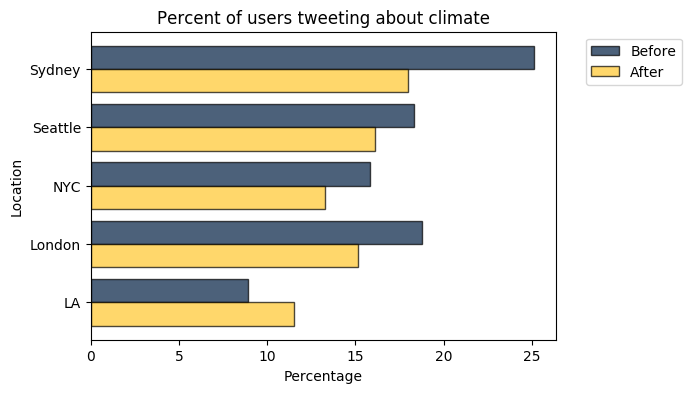

In [16]:
users_table = Table().with_columns("Location", ["Sydney", "Seattle", "NYC", "London", "LA"],
                                   "Before", [25.1, 18.3, 15.86, 18.8, 8.94],
                                   "After", [18.0, 16.1, 13.27, 15.15, 11.54])

users_table.barh("Location")
plt.xlabel("Percentage")
plt.title("Percent of users tweeting about climate")

Let's also see which categories of terms were most common.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tkinter
%matplotlib inline

def print_by_category(location):
    before_categories = {"General 1":0, "General 2":0, "Risk/Disaster":0, "Politics/Opinion":0,
                          "Economy":0, "Energy 1":0, "Energy 2":0, "Oceans/Water":0, "Weather":0,
                          "Agriculture/Forestry":0, "Arctic":0, "Current Hashtags":0, 
                          "Campaign Hashtags":0, "Negotiation/Summit Hashtags":0,
                          "Related Hashtags":0, "Harvard Dataverse Terms":0, 
                          "My Additions":0, "User @s":0 }
    after_categories = {"General 1":0, "General 2":0, "Risk/Disaster":0, "Politics/Opinion":0,
                          "Economy":0, "Energy 1":0, "Energy 2":0, "Oceans/Water":0, "Weather":0,
                          "Agriculture/Forestry":0, "Arctic":0, "Current Hashtags":0, 
                          "Campaign Hashtags":0, "Negotiation/Summit Hashtags":0,
                          "Related Hashtags":0, "Harvard Dataverse Terms":0, 
                          "My Additions":0, "User @s":0 }
    
    before = open("climate-tweets/" + location.lower() + "-climate-tweets-before.txt", 'r')
    after = open("climate-tweets/" + location.lower() + "-climate-tweets-after.txt", 'r')
    before_lines = before.readlines()
    after_lines = after.readlines()
    before.close()
    after.close()
    
    for line in before_lines:
        category = line.split('\t')[-1][:-1]
        before_categories[category] += 1
    for line in after_lines:
        category = line.split('\t')[-1][:-1]
        after_categories[category] += 1
        
    # draw bar graph
    plt.rcdefaults()
    fig, ax = plt.subplots()
    width = 0.45  # the width of the bars

    y_pos = np.arange(len(before_categories.keys()))

    ax.barh(y_pos - width/2, before_categories.values(), width, label="Before")
    ax.barh(y_pos + width/2, after_categories.values(), width, label="After")
    ax.set_yticks(y_pos)
    ax.set_yticklabels(before_categories.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Count')
    ax.set_title('Tweet counts by category and date: ' + location)
    ax.legend()
    
    fig.tight_layout()

    plt.show()

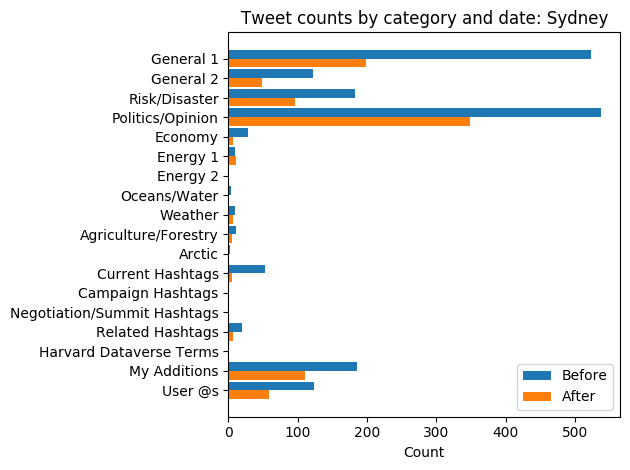

In [2]:
print_by_category("Sydney")

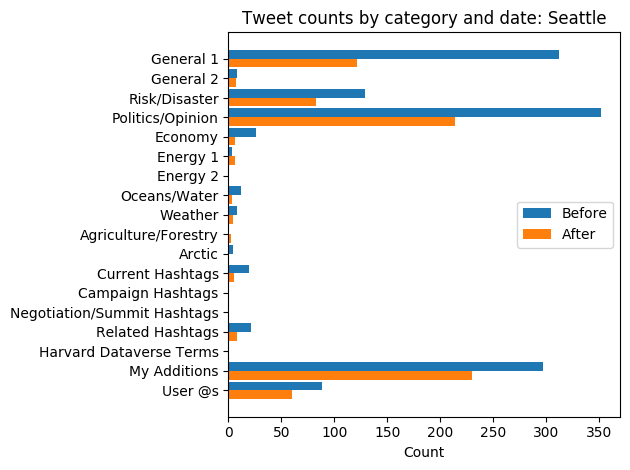

In [3]:
print_by_category("Seattle")

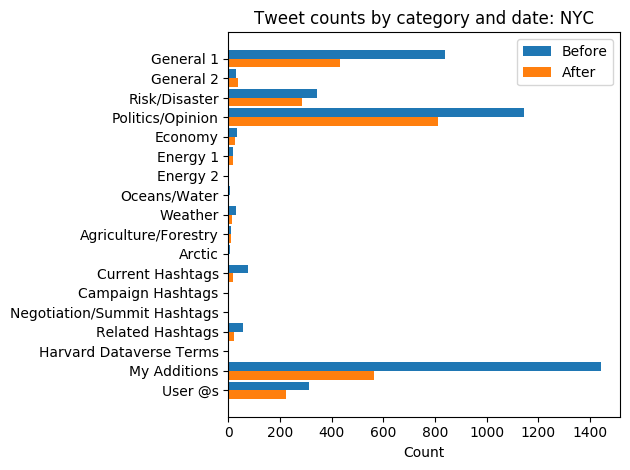

In [4]:
print_by_category("NYC")

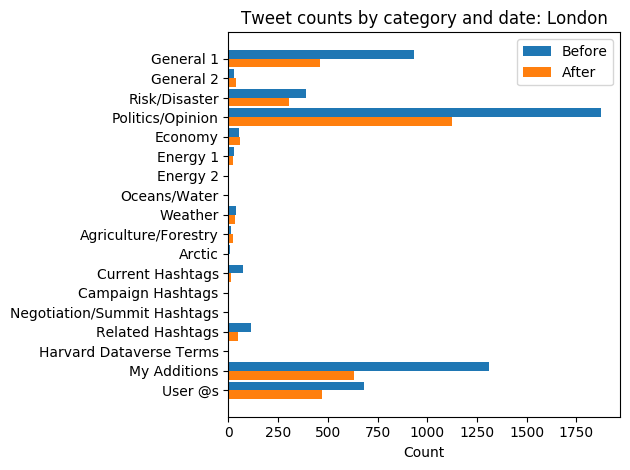

In [5]:
print_by_category("London")

In [6]:
print_by_category("LA")

Last thing: let's create one large file to contain all climate tweets from before and one with all climate tweets from after.

In [35]:
loc_list = ["Sydney", "Seattle", "NYC", "London", "LA"]

num_before = 0
num_after = 0

before_out = open("climate-tweets/before-covid-climate-tweets-all.txt", "w")
for loc in loc_list:
    f = open("climate-tweets/" + loc.lower() + "-climate-tweets-before.txt", "r")
    for line in f:
        num_before += 1
        before_out.write(line)
    f.close()
before_out.close()

after_out = open("climate-tweets/after-covid-climate-tweets-all.txt", "w")
for loc in loc_list:
    f = open("climate-tweets/" + loc.lower() + "-climate-tweets-after.txt", "r")
    for line in f:
        num_after += 1
        after_out.write(line)
    f.close()
after_out.close()

print(num_before, "total climate tweets before COVID")
print(num_after, "total climate tweets after COVID")

15311 total climate tweets before COVID
9843 total climate tweets after COVID
